Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


ETS(M,A,M) 

Call:
 ets(y = austourists_train_data, model = "MAM") 

  Smoothing parameters:
    alpha = 0.3223 
    beta  = 1e-04 
    gamma = 0.1951 

  Initial states:
    l = 27.9164 
    b = 0.4511 
    s = 1.059 0.9461 0.7925 1.2025

  sigma:  0.0654

     AIC     AICc      BIC 
336.8985 340.8116 355.1267 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.1272526 2.132348 1.579408 -0.2918021 4.467637 0.5801713
                   ACF1
Training set 0.02425731


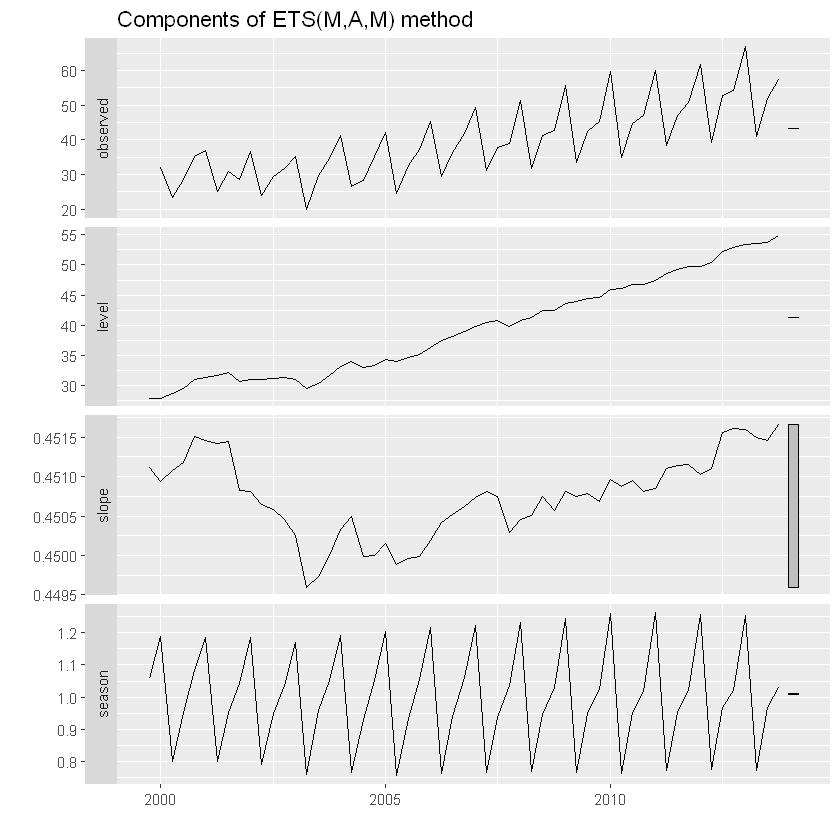

In [1]:
library(forecast)
library(fpp2)

austourists_train_data <- window(austourists, start=c(2000,1), end=c(2013,4))
austourists_test_data <- window(austourists, start=c(2014,1), end=c(2015,4))

austourists_ets <- ets(austourists_train_data, model="MAM")

summary(austourists_ets)
autoplot(austourists_ets)

austourists 데이터를 train을 위한 데이터와 test를 위한 데이터로 쪼갭니다.<br/>
train용 데이터를 이용해 ETS로 먼저 적합시킵니다.<br/>

적합된 모형에 대해 요약해 살펴보며, 관측이나 slope(추세)등을 차트로 도식화해보는 코드입니다.<br/>

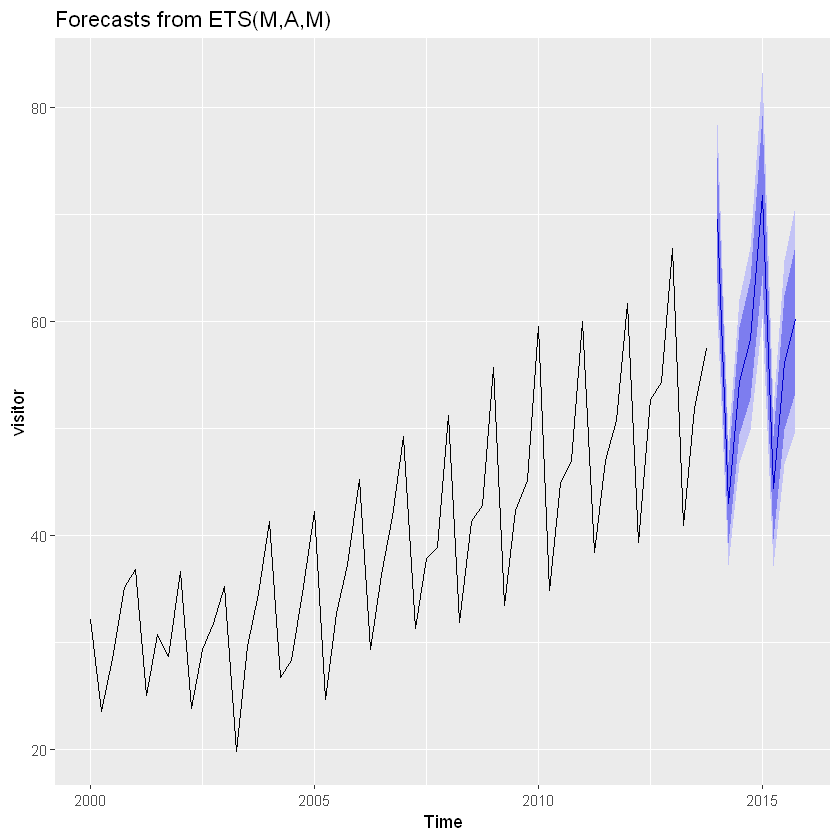

In [2]:
# ets 예측하기
austourists_ets_fore <- forecast(austourists_ets, h=8)
autoplot(austourists_ets_fore, xlab="Time",ylab="visitor")

R의 forecast 패키지에서 제공하는 ETS의 경우 forecast()함수를 통해 예측을 별도로 시행해야합니다.<br/>
두 주기를 살펴보았네요.<br/>

In [3]:
austourists_hw <- hw(austourists_train_data, seasonal="multiplicative")
summary(austourists_hw)
# autoplot(austourists_hw)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = austourists_train_data, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.247 
    beta  = 1e-04 
    gamma = 0.2752 

  Initial states:
    l = 29.2347 
    b = 0.4921 
    s = 1.047 0.9652 0.7978 1.19

  sigma:  0.0666

     AIC     AICc      BIC 
339.6269 343.5400 357.8551 

Error measures:
                      ME     RMSE      MAE        MPE    MAPE      MASE
Training set -0.04120561 2.145898 1.551358 -0.8266727 4.44042 0.5698674
                  ACF1
Training set 0.1093837

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014 Q1       69.42268 63.49483 75.35054 60.35681 78.48856
2014 Q2       42.95056 39.17419 46.72692 37.17510 48.72601
2014 Q3       54.63372 49.69759 59.56986 47.08456 62.18289
2014 Q4       58.41868 53.00468 63.83269 50.13868 66.69869
2015 Q1       71.86556 64.49213 79.23899 60.58887 83.14225
2015

ETS를 MAM으로 설정했으니, 이번에는 비교를 위하여 train용 데이터를 이용해 홀트계절지수 **승법** 모형으로 적합시키고 적합된 모형을 요약해봅니다.<br/>

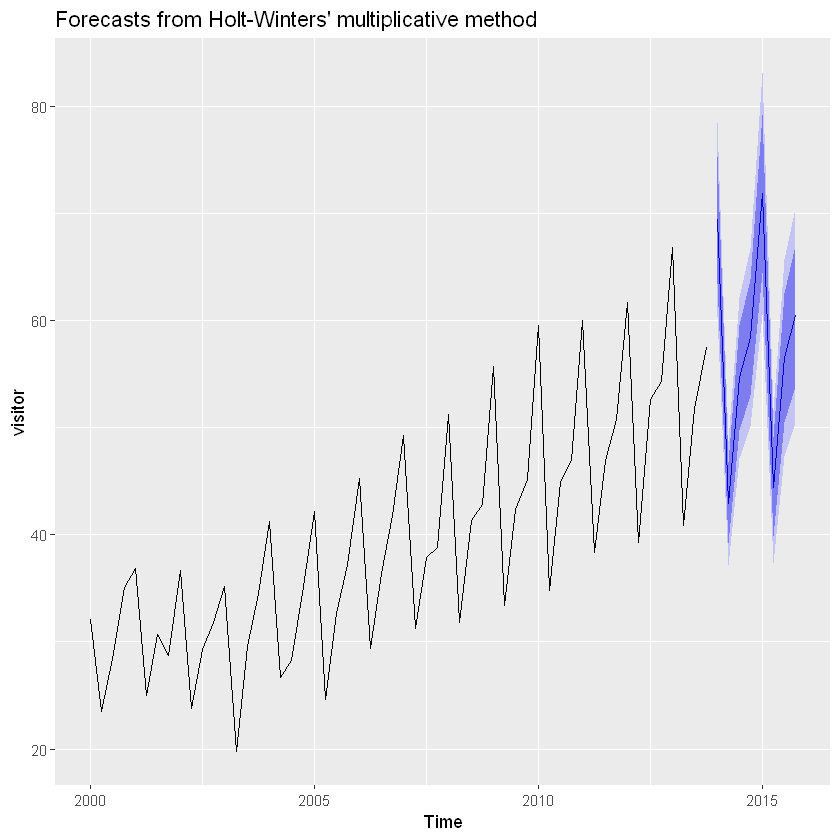

In [4]:
# hw 예측하기
austourists_hw_fore <- forecast(austourists_hw, h=8)
autoplot(austourists_hw_fore, xlab="Time",ylab="visitor")

홀트 계절지수평활법 역시 굳이 별도로 예측을 시행해보았습니다.<br/>

In [5]:
# 평가
accuracy(austourists_ets_fore,austourists_test_data)
accuracy(austourists_hw_fore,austourists_test_data)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1272526,2.132348,1.579408,-0.2918021,4.467637,0.5801713,0.02425731,NA
Test set,1.6437781,3.385200,2.707598,2.8155332,4.445871,0.9945943,0.43513528,0.2256156


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.04120561,2.145898,1.551358,-0.8266727,4.440420,0.5698674,0.1093837,NA
Test set,1.54112579,3.251422,2.583929,2.6482491,4.246379,0.9491665,0.4227807,0.2140933


예측을 시행했으니 test 데이터와 accuracy() 함수로 두 모형에 대한 예측 평가를 해봅니다.<br/>
RMSE 측도를 기준으로 보았을 때 간발의 차이로 ets가 더 적합이 잘 되었지만, test 데이터에 대해서는 오차가 크네요?<br/>

이런 경우 홀트계절지수모형을 적합시킨 경우 보다 학습용 데이터에 과하게 적합되었다 판단하여 저라면 홀트계절지수모형이 더 좋은 모형이다 라고 결론을 내리겠습니다.<br/>